In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
vfl=pd.read_csv('vflabel.csv',index_col=0)

In [3]:
vfl.head(5).T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [4]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [5]:
!pip install category_encoders

In [6]:
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']

In [7]:
import category_encoders as ce
woe = ce.WOEEncoder(cols=cols)

In [8]:
#Peform the train test split 
X_trw, X_tew, y_trw, y_tew = train_test_split(vfl.drop(columns='FraudFound_P'), 
                                                    vfl.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vfl.FraudFound_P)

In [9]:
lab_train = woe.fit_transform(X_trw, y_trw)
lab_test=woe.transform(X_tew)

In [10]:
lab_traindf=pd.concat([lab_train,y_trw],axis='columns')
lab_testdf=pd.concat([lab_test,y_tew],axis='columns')
lab_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,-0.196448,0.189110,0.248719,0.189110,0.009191
WeekOfMonth,0.004337,-0.077121,0.004337,0.004337,-0.047068
DayOfWeek,0.184856,0.086822,0.054290,0.086822,-0.102922
Make,0.070328,-0.047033,0.891358,-0.110091,-0.046424
AccidentArea,-0.051058,-0.051058,-0.051058,-0.051058,0.366069
DayOfWeekClaimed,-0.030445,0.068844,0.144858,0.068844,0.068844
MonthClaimed,-0.305107,-0.021520,0.339382,0.182242,0.290890
WeekOfMonthClaimed,0.079716,-0.042402,-0.069481,-0.003992,0.079716
Sex,-0.367150,0.056069,0.056069,0.056069,0.056069
MaritalStatus,0.008056,0.008056,0.008056,-0.021599,-0.021599


In [11]:
from pycaret.classification import *
s = setup(lab_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,train_size=0.8,fold_shuffle=True,fold=5,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =True,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
from sklearn.metrics import average_precision_score

add_metric('AUPRC','Average',average_precision_score,greater_is_better = True)  
setup_label = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0598,0.0160
gbc,Gradient Boosting Classifier,0.9401,0.7926,0.0153,0.4250,0.0293,0.0257,0.0706,0.0671,0.7080
lightgbm,Light Gradient Boosting Machine,0.9387,0.8152,0.0339,0.3407,0.0614,0.0519,0.0916,0.0717,0.1620
rf,Random Forest Classifier,0.9374,0.7860,0.0254,0.2436,0.0457,0.0355,0.0614,0.0664,0.6460
et,Extra Trees Classifier,0.9369,0.7946,0.0407,0.3003,0.0713,0.0578,0.0910,0.0695,0.5420
ada,Ada Boost Classifier,0.9145,0.7811,0.1458,0.2058,0.1685,0.1252,0.1282,0.0809,0.2100
dt,Decision Tree Classifier,0.8701,0.5484,0.1831,0.1186,0.1439,0.0770,0.0792,0.0715,0.0380
knn,K Neighbors Classifier,0.7737,0.7012,0.4932,0.1308,0.2067,0.1239,0.1615,0.0951,0.7420
qda,Quadratic Discriminant Analysis,0.6778,0.7770,0.7831,0.1319,0.2257,0.1374,0.2252,0.1166,0.0220
nb,Naive Bayes,0.6675,0.7845,0.8220,0.1330,0.2288,0.1403,0.2359,0.1201,0.0140


In [15]:
label_gbc = create_model('lr',fold=5)
tuned_label_gbc=tune_model(label_gbc,optimize='F1',fold=5)
print(tuned_label_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Average
Fold,,,,,,,,
0,0.6651,0.8142,0.9068,0.1413,0.2446,0.1574,0.2714,0.1337
1,0.6363,0.8099,0.8475,0.1250,0.2179,0.1269,0.2271,0.1151
2,0.6570,0.7968,0.8729,0.1346,0.2333,0.1447,0.2512,0.1251
3,0.6351,0.8121,0.8814,0.1284,0.2241,0.1337,0.2414,0.1203
4,0.6113,0.7723,0.8305,0.1160,0.2035,0.1101,0.2050,0.1065
Mean,0.6410,0.8011,0.8678,0.1291,0.2247,0.1346,0.2392,0.1201
Std,0.0189,0.0156,0.0266,0.0086,0.0139,0.0160,0.0224,0.0092


LogisticRegression(C=9.921, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   24.2s


{'class_weight': {0: 0.1293467336683417, 1: 0.8706532663316583}}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   33.5s finished


Text(0.5, 1.0, 'Scoring for different class weights')

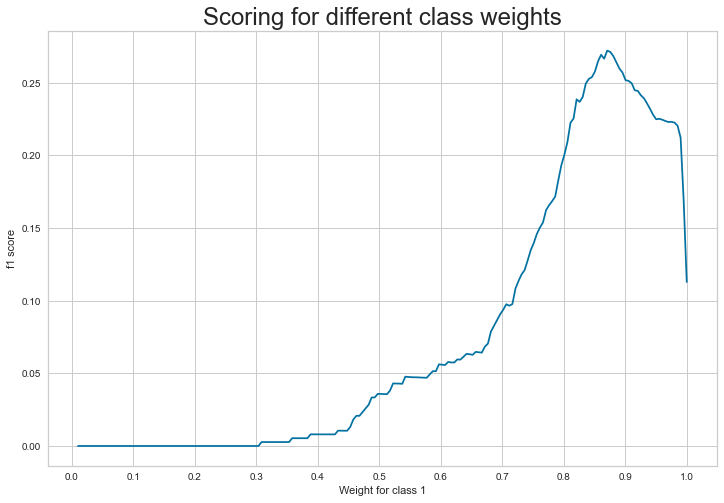

In [18]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(lab_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('f1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the training data: 0.28461833525124663
The f1 score for the testing data: 0.21162444113263784
Train 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92     11598
           1       0.20      0.50      0.28       738

    accuracy                           0.85     12336
   macro avg       0.58      0.69      0.60     12336
weighted avg       0.92      0.85      0.88     12336

Test 
               precision    recall  f1-score   support

           0       0.96      0.86      0.90      2899
           1       0.15      0.38      0.21       185

    accuracy                           0.83      3084
   macro avg       0.55      0.62      0.56      3084
weighted avg       0.91      0.83      0.86      3084



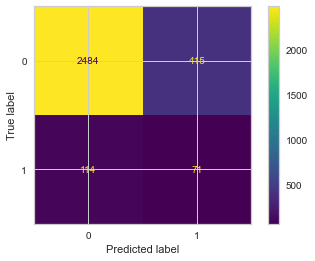

In [20]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.13, 1: 0.87})
lr.fit(lab_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(lab_train)
pred_test = lr.predict(lab_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train \n",classification_report(y_trw,pred_train))
print("Test \n",classification_report(y_tew,pred_test))
plt.show()

Best Threshold=0.975091, F-Score=nan


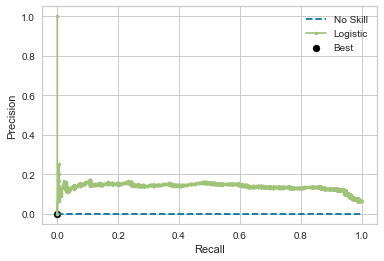

In [22]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
model = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.13, 1: 0.87})
model.fit(lab_train,y_trw)
# predict probabilities
yhat = model.predict_proba(lab_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.559410, F-Score=nan


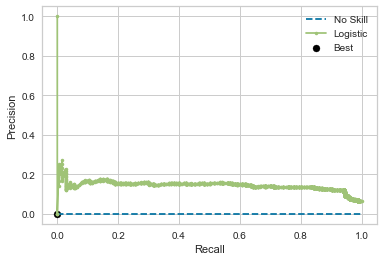

In [23]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
model = LogisticRegression()
model.fit(lab_train,y_trw)
# predict probabilities
yhat = model.predict_proba(lab_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [24]:
import category_encoders as ce
CBE= ce.CatBoostEncoder(cols=cols)

In [25]:
CBE_train = CBE.fit_transform(X_trw, y_trw)
CBE_test=CBE.transform(X_tew)

In [26]:
CBE_traindf=pd.concat([lab_train,y_trw],axis='columns')
CBE_testdf=pd.concat([lab_test,y_tew],axis='columns')
CBE_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,-0.196448,0.189110,0.248719,0.189110,0.009191
WeekOfMonth,0.004337,-0.077121,0.004337,0.004337,-0.047068
DayOfWeek,0.184856,0.086822,0.054290,0.086822,-0.102922
Make,0.070328,-0.047033,0.891358,-0.110091,-0.046424
AccidentArea,-0.051058,-0.051058,-0.051058,-0.051058,0.366069
DayOfWeekClaimed,-0.030445,0.068844,0.144858,0.068844,0.068844
MonthClaimed,-0.305107,-0.021520,0.339382,0.182242,0.290890
WeekOfMonthClaimed,0.079716,-0.042402,-0.069481,-0.003992,0.079716
Sex,-0.367150,0.056069,0.056069,0.056069,0.056069
MaritalStatus,0.008056,0.008056,0.008056,-0.021599,-0.021599


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   12.6s


{'class_weight': {0: 0.06964824120603015, 1: 0.9303517587939698}}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.1s finished


Text(0.5, 1.0, 'Scoring for different class weights')

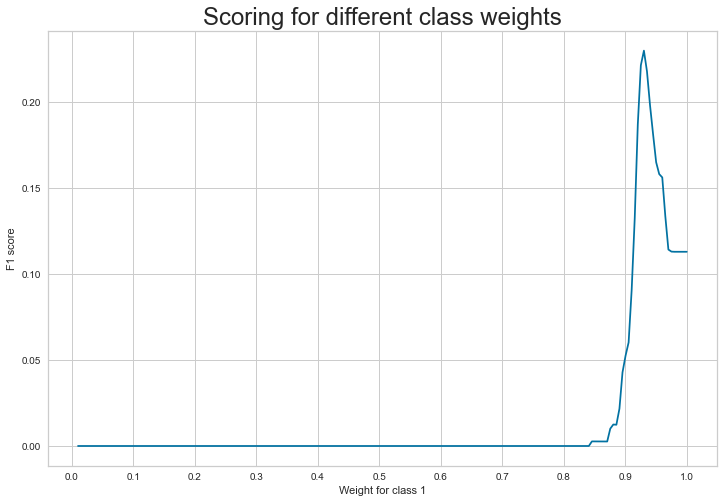

In [27]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(CBE_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the training data: 0.22631390775831248
The f1 score for the testing data: 0.21450712957222567
Train
               precision    recall  f1-score   support

           0       0.99      0.64      0.77     11598
           1       0.13      0.86      0.23       738

    accuracy                           0.65     12336
   macro avg       0.56      0.75      0.50     12336
weighted avg       0.93      0.65      0.74     12336

Test
               precision    recall  f1-score   support

           0       0.99      0.57      0.72      2899
           1       0.12      0.94      0.21       185

    accuracy                           0.59      3084
   macro avg       0.56      0.75      0.47      3084
weighted avg       0.94      0.59      0.69      3084



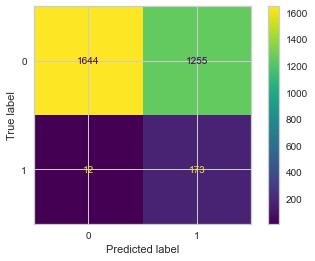

In [39]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.07, 1: 0.93})

lr.fit(CBE_train,y_trw)

# Predicting on the test data
pred_train =lr.predict(CBE_train)
pred_test = lr.predict(CBE_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train\n",classification_report(y_trw,pred_train))
print("Test\n",classification_report(y_tew,pred_test))
plt.show()

In [40]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
model = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.07, 1: 0.93})
model.fit(CBE_train,y_trw)
# predict probabilities
yhat = model.predict_proba(CBE_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_tew, to_labels(yhat, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
'''
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()
'''

Threshold=0.636, F-Score=0.27839


"\n# calculate roc curves\nprecision, recall, thresholds = precision_recall_curve(y_tew, yhat)\n# convert to f score\nfscore = (2 * precision * recall) / (precision + recall)\n# locate the index of the largest f score\nix = argmax(fscore)\nprint('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))\n# plot the roc curve for the model\nno_skill = len([y_tew==1]) / len(y_tew)\npyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')\npyplot.plot(recall, precision, marker='.', label='Logistic')\npyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')\n# axis labels\npyplot.xlabel('Recall')\npyplot.ylabel('Precision')\npyplot.legend()\n# show the plot\npyplot.show()\n"

The f1 score for the training data: 0.18936170212765957
The f1 score for the testing data: 0.2643979057591623
Train 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11598
           1       0.16      0.24      0.19       738

    accuracy                           0.88     12336
   macro avg       0.55      0.58      0.56     12336
weighted avg       0.90      0.88      0.89     12336

Test 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      2899
           1       0.17      0.55      0.26       185

    accuracy                           0.82      3084
   macro avg       0.57      0.69      0.58      3084
weighted avg       0.92      0.82      0.86      3084



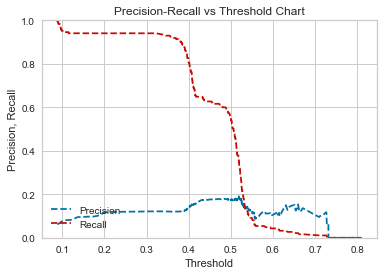

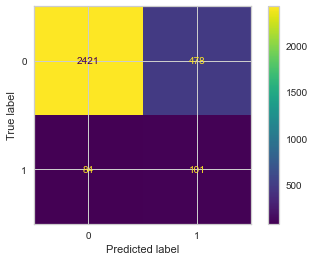

In [41]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.13, 1: 0.87})
lr.fit(CBE_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(CBE_train)
pred_test = lr.predict(CBE_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)
### Predict test_y values and probabilities based on fitted logistic 
### regression model

pred_y=lr.predict(CBE_test) 

probs_y=lr.predict_proba(CBE_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_tew, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train \n",classification_report(y_trw,pred_train))
print("Test \n",classification_report(y_tew,pred_test))
plt.show()

In [92]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import *
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
ros = BorderlineSMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
smote_enn = SMOTEENN(random_state=0)

In [93]:
from pycaret.classification import *
s = setup(CBE_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,fix_imbalance_method=SmoteTomek,train_size=0.8,fold_shuffle=True,fold=5,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =True,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [94]:
BEST_CBE = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9398,0.7942,0.0102,0.2857,0.0195,0.0165,0.0448,0.7580
lightgbm,Light Gradient Boosting Machine,0.9392,0.8108,0.0339,0.4363,0.0622,0.0535,0.1052,0.1840
rf,Random Forest Classifier,0.9378,0.7792,0.0186,0.2571,0.0342,0.0259,0.0522,0.7420
et,Extra Trees Classifier,0.9375,0.7965,0.0390,0.3206,0.0687,0.0565,0.0925,0.5320
ada,Ada Boost Classifier,0.9223,0.7776,0.1271,0.2399,0.1633,0.1266,0.1351,0.2440
dt,Decision Tree Classifier,0.8771,0.5680,0.2169,0.1472,0.1750,0.1115,0.1140,0.0700
knn,K Neighbors Classifier,0.7711,0.7004,0.4864,0.1280,0.2026,0.1192,0.1559,0.3940
qda,Quadratic Discriminant Analysis,0.6740,0.7754,0.7932,0.1316,0.2258,0.1373,0.2271,0.0580
nb,Naive Bayes,0.6594,0.7859,0.8356,0.1317,0.2274,0.1384,0.2367,0.0460
lr,Logistic Regression,0.6335,0.7995,0.8847,0.1285,0.2244,0.1340,0.2421,0.0900


SMOTE+CBE=

ADASYN+CBE
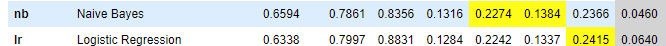
RandomOverSampler+CBE
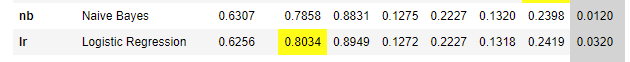
BorderlineSMOTE+CBE
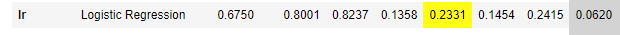
RandomUnderSampler+CBE
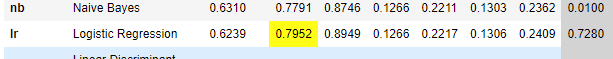
SMOTEENN+CBE
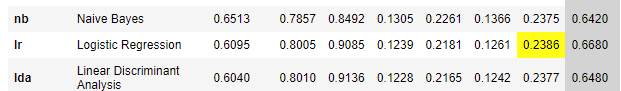


In [95]:
## Running SMOTEENN+CBE
CBE_lr = create_model('lr',fold=5)
tuned_cbe_lr=tune_model(CBE_lr,optimize='F1')
print(tuned_cbe_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6606,0.8121,0.9068,0.1397,0.2421,0.1545,0.2684
1,0.6373,0.8061,0.8644,0.1272,0.2217,0.1312,0.2352
2,0.6479,0.7957,0.8983,0.1343,0.2337,0.1448,0.2567
3,0.6336,0.8125,0.8898,0.1288,0.2251,0.1347,0.2442
4,0.6001,0.7696,0.8305,0.1130,0.1990,0.1047,0.1987
Mean,0.6359,0.7992,0.8780,0.1286,0.2243,0.1340,0.2406
Std,0.0202,0.0160,0.0276,0.0089,0.0145,0.0167,0.0238


LogisticRegression(C=8.933, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [96]:
pred_holdout = predict_model(tuned_cbe_lr)
pred_unseen = predict_model(tuned_cbe_lr, data =CBE_testdf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9400,0.7199,0.0135,0.5000,0.0263,0.0232,0.0747


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9400,0.6712,0.0108,0.5000,0.0212,0.0187,0.0668


In [33]:
### Trying Label Encoder 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']
vfl[cols]=vfl[cols].apply(LabelEncoder().fit_transform)
vfl.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,age_bins
0,2,4,6,6,1,6,5,0,0,2,...,3,0,0,0,3,0,2,0,2,2
1,4,2,6,6,1,2,5,3,1,2,...,4,1,0,0,3,3,0,0,1,3
2,10,4,0,6,1,5,10,1,1,1,...,6,0,0,0,3,3,0,0,1,0
3,6,1,2,17,0,1,6,0,1,1,...,7,1,0,0,2,3,0,0,2,1
4,4,4,1,6,1,6,4,1,0,2,...,4,0,0,0,3,3,0,0,1,3


In [34]:
#Peform the train test split 
X_trla, X_tela, y_trla, y_tela = train_test_split(vfl.drop(columns='FraudFound_P'), 
                                                    vfl.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vfl.FraudFound_P)

In [35]:
label_traindf=pd.concat([X_trla,y_trla],axis='columns')
label_testdf=pd.concat([X_tela,y_tela],axis='columns')
label_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,2,7,1,7,0
WeekOfMonth,0,4,0,0,2
DayOfWeek,3,0,1,0,6
Make,6,17,0,2,9
AccidentArea,1,1,1,1,0
DayOfWeekClaimed,6,1,7,1,1
MonthClaimed,3,1,2,8,9
WeekOfMonthClaimed,0,1,4,2,0
Sex,0,1,1,1,1
MaritalStatus,1,1,1,2,2


In [36]:
from imblearn.over_sampling import *
from imblearn.combine import SMOTETomek
SmoteTomek = SMOTETomek()

In [37]:
from pycaret.classification import *
s = setup(label_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,fix_imbalance_method=SmoteTomek,train_size=0.8,fold_shuffle=True,fold=5,
            feature_selection=True,feature_selection_threshold=0.6,
            ignore_low_variance =True,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
setup_l = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,8.5320
rf,Random Forest Classifier,0.9399,0.7838,0.0051,0.1200,0.0098,0.0080,0.0184,9.1960
et,Extra Trees Classifier,0.9397,0.7904,0.0186,0.3571,0.0353,0.0303,0.0707,9.2740
lightgbm,Light Gradient Boosting Machine,0.9380,0.8128,0.0271,0.2958,0.0493,0.0398,0.0731,8.9180
gbc,Gradient Boosting Classifier,0.9364,0.7890,0.0254,0.2231,0.0452,0.0334,0.0562,10.3920
ada,Ada Boost Classifier,0.8943,0.7779,0.2322,0.1887,0.2075,0.1517,0.1530,8.8920
dt,Decision Tree Classifier,0.8870,0.5439,0.1542,0.1286,0.1399,0.0801,0.0806,8.4460
lr,Logistic Regression,0.6999,0.7872,0.7644,0.1382,0.2340,0.1477,0.2321,8.8400
lda,Linear Discriminant Analysis,0.6724,0.7871,0.8102,0.1332,0.2287,0.1404,0.2337,8.5960
ridge,Ridge Classifier,0.6708,0.0000,0.8051,0.1319,0.2267,0.1381,0.2303,8.4120


In [28]:
setup=setup(CBE_traindf, target ='FraudFound_P',data_split_stratify=True,
          train_size=0.8, fold=5, session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
## Checking CatBoost Encoded Model again with logistic regression
CBE_lr = create_model('lr',fold=5)
tuned_cbe_lr=tune_model(CBE_lr,optimize='F1',custom_grid={'class_weight':{0: 0.07, 1: 0.93}},fold=5)
print(tuned_cbe_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9387,0.8020,0.0254,0.3333,0.0472,0.0391,0.0781
1,0.9397,0.8104,0.0339,0.4444,0.0630,0.0550,0.1098
2,0.9372,0.8299,0.0169,0.2000,0.0312,0.0221,0.0422
3,0.9402,0.8306,0.0254,0.5000,0.0484,0.0428,0.1025
4,0.9377,0.8229,0.0000,0.0000,0.0000,-0.0049,-0.0127
Mean,0.9387,0.8192,0.0203,0.2956,0.0380,0.0308,0.0640
Std,0.0012,0.0112,0.0115,0.1799,0.0215,0.0207,0.0450


LogisticRegression(C=1.0, class_weight=0.07, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [97]:
## https://www.aiproblog.com/index.php/2019/11/24/how-to-perform-feature-selection-with-categorical-data/#:~:text=The%20two%20most%20commonly%20used%20feature%20selection%20methods,to%20perform%20feature%20selection%20with%20categorical%20input%20data.